In [4]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_GR = df[(df["job_country"] == "Greece") & (df["job_title_short"] == "Data Analyst")]

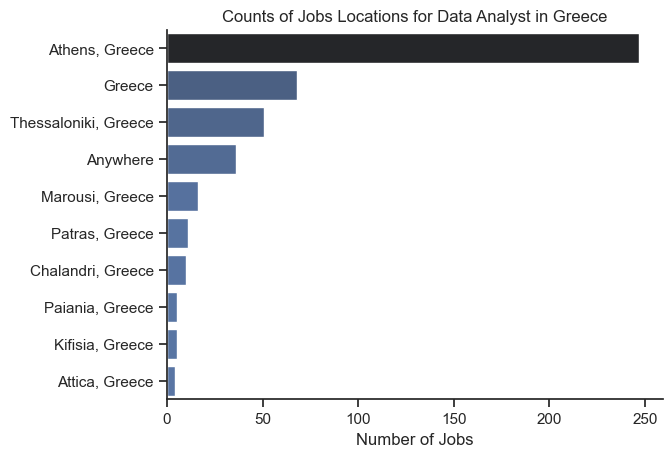

In [13]:
df_plot = df_DA_GR["job_location"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="job_location", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Counts of Jobs Locations for Data Analyst in Greece")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

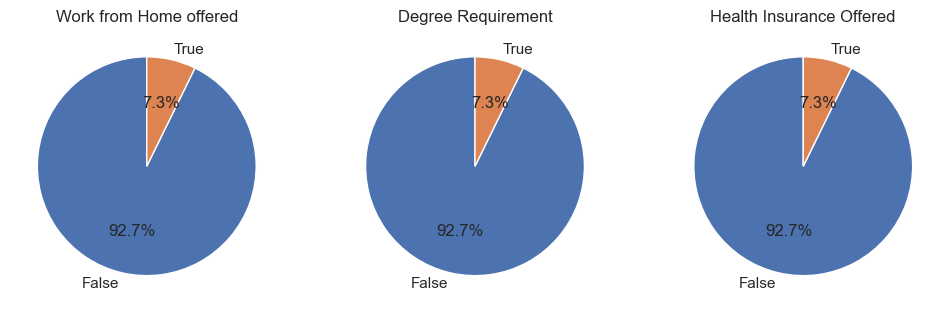

In [14]:
dict_column = {
    "job_work_from_home": "Work from Home offered",
    "job_no_degree_mention": "Degree Requirement",
    "job_health_insurance": "Health Insurance Offered"   
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_GR["job_work_from_home"].value_counts(), startangle=90, autopct="%1.1f%%", labels=["False", "True"])
    ax[i].set_title(title)

#plt.subtitle("Benefit Analysis for Data JObs", fontsize=16)    
plt.show()

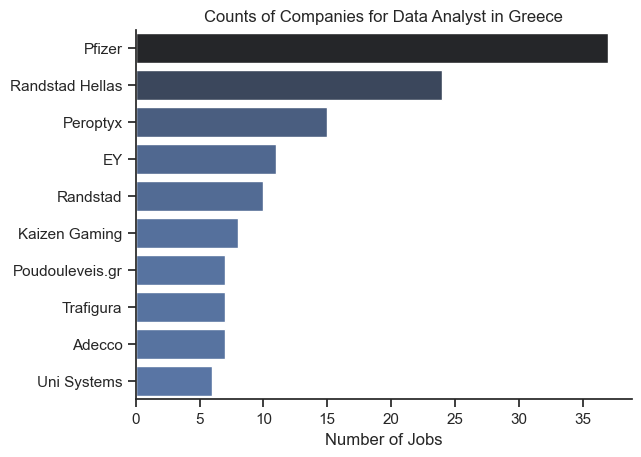

In [17]:
df_plot = df_DA_GR["company_name"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Counts of Companies for Data Analyst in Greece")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()